In [94]:
import pandas as pd
import matplotlib.pyplot as plt  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [56]:
#loading the data
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Company_Data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [58]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [59]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [60]:
len(df['Sales'].unique())

336

In [61]:
bins=[0,5,10,15,20]
labels=['worse','bad','good','better']
df['binned']=pd.cut(df['Sales'],bins=bins,labels=labels)

In [105]:
#labelencoding the categorical data 
le=preprocessing.LabelEncoder()
df['ShelveLoc']=le.fit_transform(df['ShelveLoc'])
df['US']=le.fit_transform(df['US'])
df['Urban']=le.fit_transform(df['Urban'])
df['binned']=le.fit_transform(df['binned'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,binned
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0,0.309091,0.875,1,1,0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,1,0.727273,0.000,1,1,2
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,2,0.618182,0.250,1,1,2
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,2,0.545455,0.500,1,1,0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0,0.236364,0.375,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,1,0.145455,0.500,1,1,2
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,2,0.545455,0.125,0,1,0
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,2,0.272727,1.000,1,1,0
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,0,0.454545,0.250,1,1,0


In [83]:
df['binned'].unique()

array([0, 2, 3, 4, 1])

In [87]:
df['binned'].value_counts()

0    245
2     76
3     76
1      2
4      1
Name: binned, dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int32  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int32  
 10  US           400 non-null    int32  
 11  binned       400 non-null    int32  
dtypes: float64(1), int32(4), int64(7)
memory usage: 31.4 KB


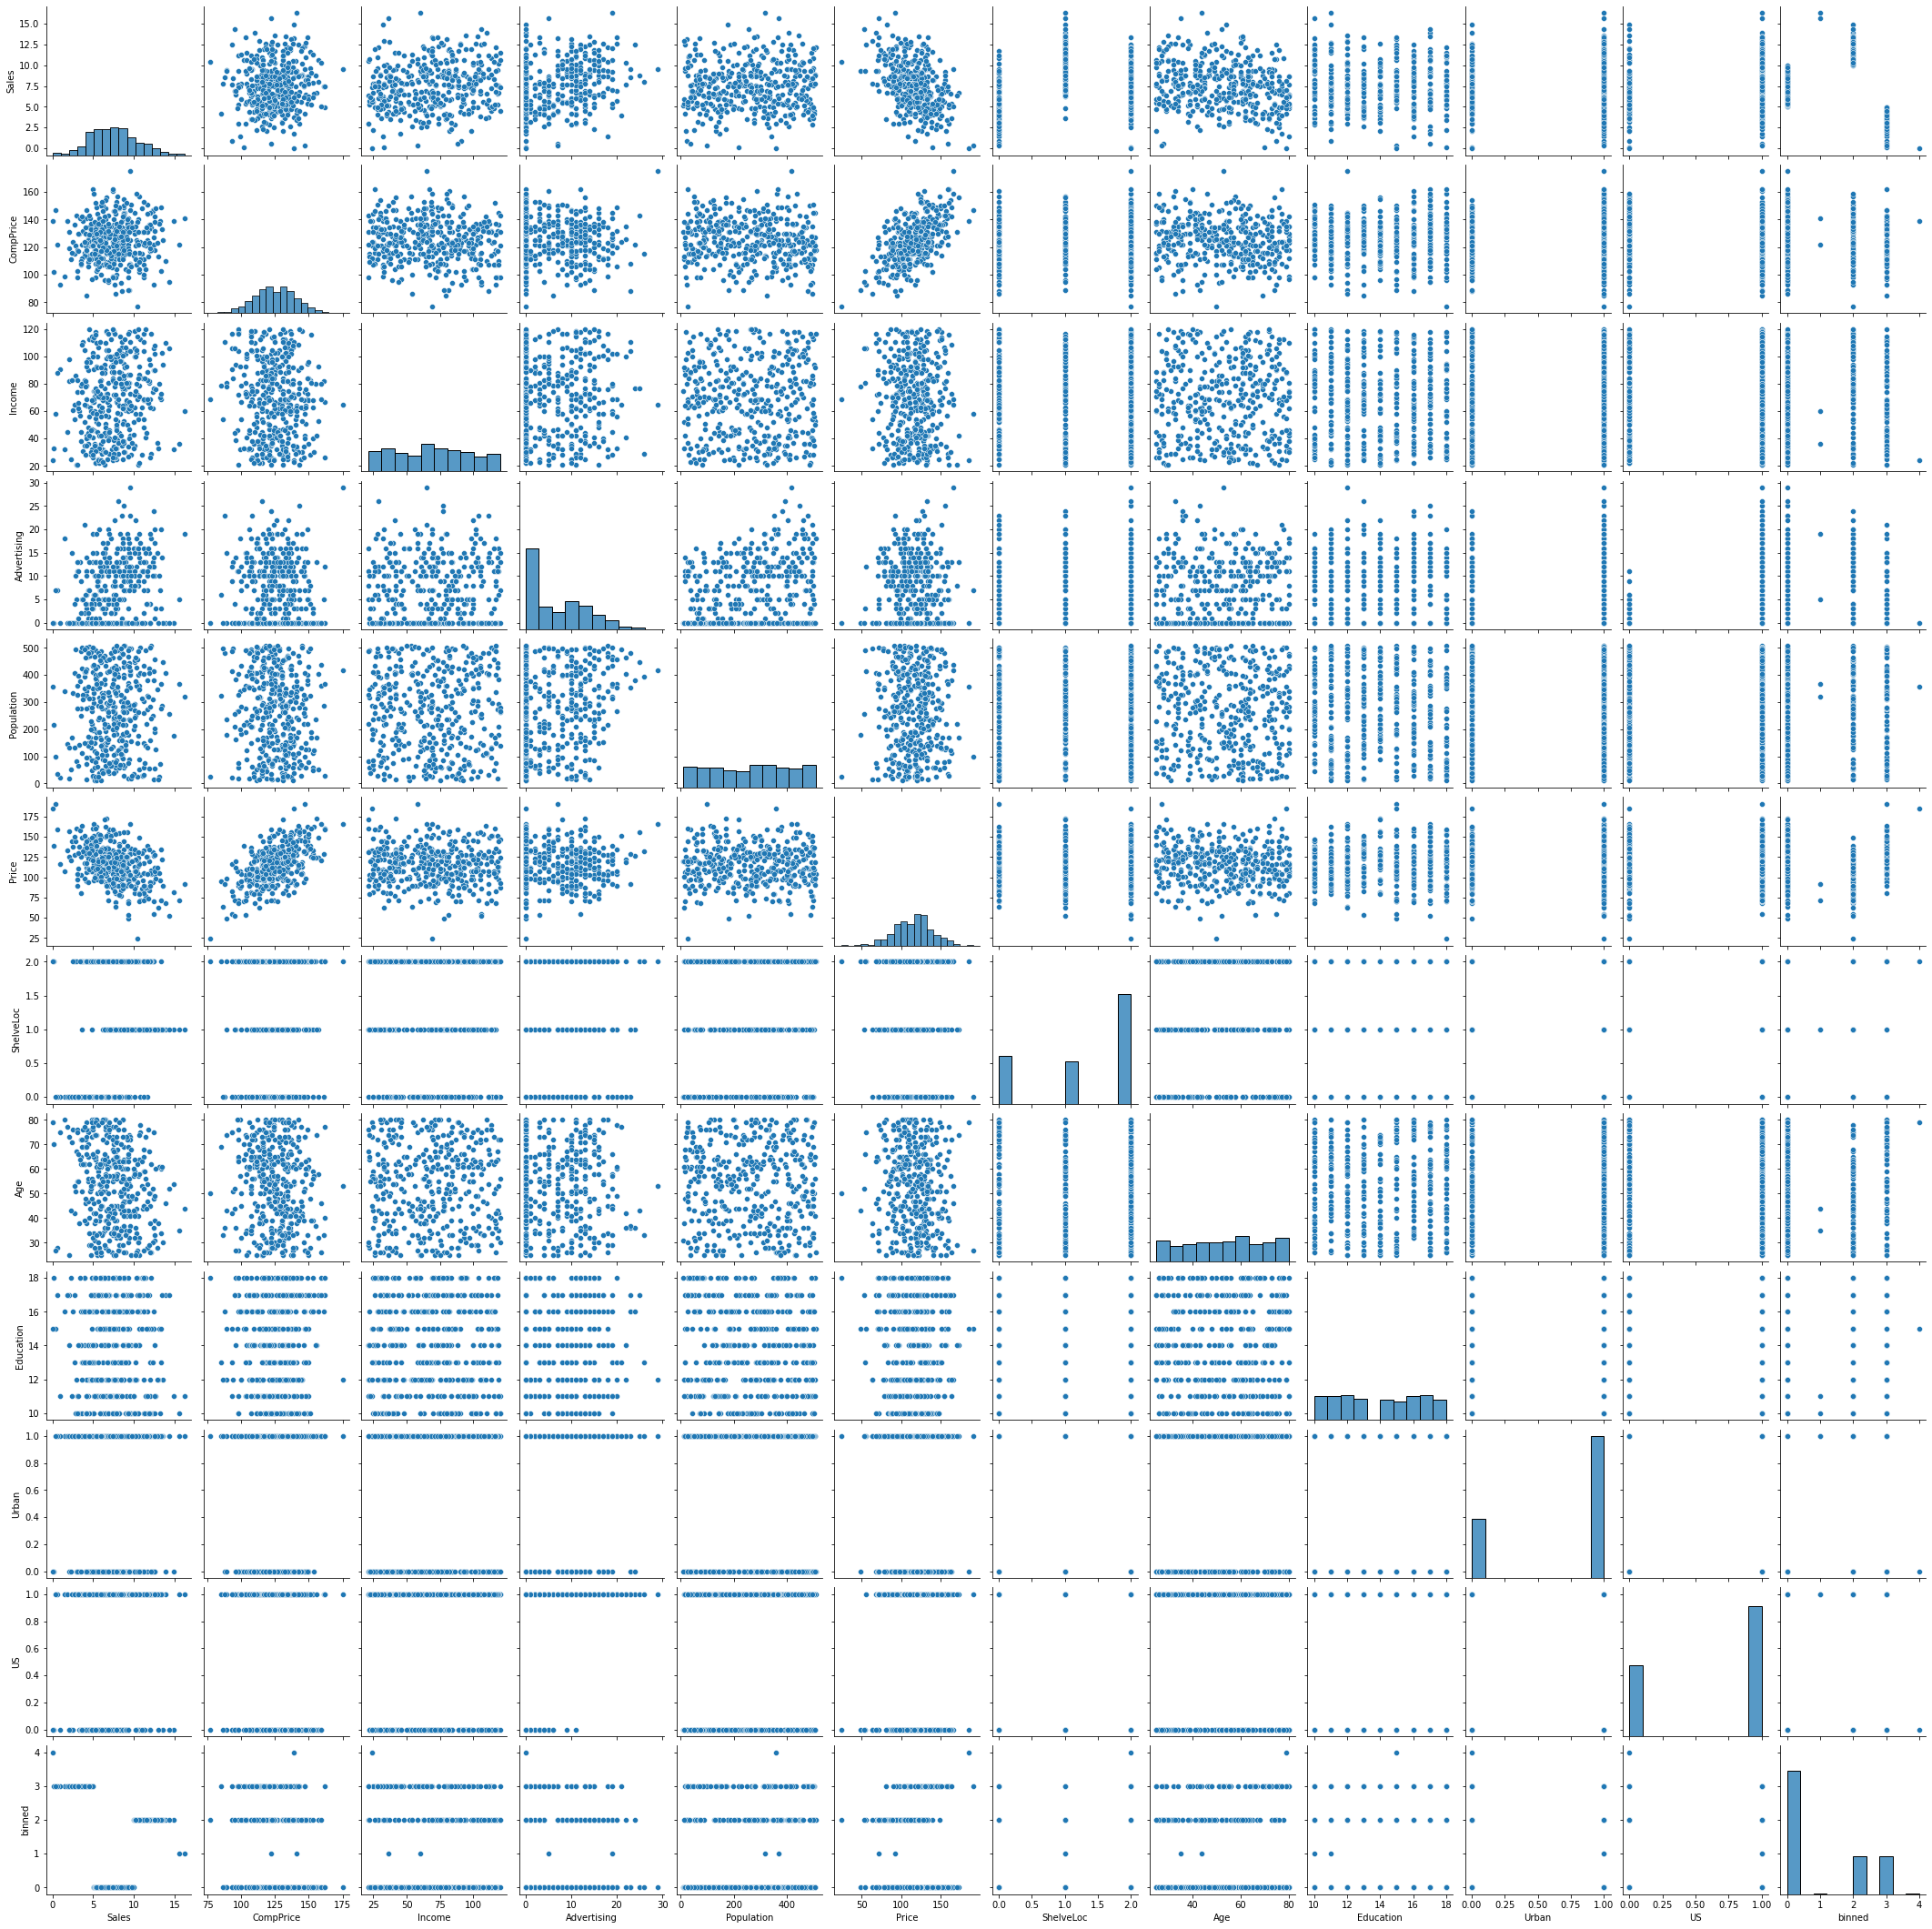

In [64]:
sns.pairplot(df)

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(df.loc[:,('Sales','CompPrice','Income','Advertising','Population','Price','Age','Education')])
df.loc[:,('Sales','CompPrice','Income','Advertising','Population','Price','Age','Education')]=scaler.transform(df.loc[:,('Sales','CompPrice','Income','Advertising','Population','Price','Age','Education')])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,binned
0,0.583897,0.622449,0.525253,0.379310,0.533066,0.574850,0,0.309091,0.875,1,1,0
1,0.689613,0.346939,0.272727,0.551724,0.501002,0.353293,1,0.727273,0.000,1,1,2
2,0.618316,0.367347,0.141414,0.344828,0.519038,0.335329,2,0.618182,0.250,1,1,2
3,0.454825,0.408163,0.797980,0.137931,0.913828,0.437126,2,0.545455,0.500,1,1,0
4,0.255071,0.653061,0.434343,0.103448,0.661323,0.622754,0,0.236364,0.375,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.772588,0.622449,0.878788,0.586207,0.386774,0.622754,1,0.145455,0.500,1,1,2
396,0.377382,0.632653,0.020202,0.103448,0.054108,0.574850,2,0.545455,0.125,0,1,0
397,0.455439,0.867347,0.050505,0.413793,0.717435,0.808383,2,0.272727,1.000,1,1,0
398,0.365089,0.234694,0.585859,0.241379,0.549098,0.425150,0,0.454545,0.250,1,1,0


In [109]:
x=df.iloc[:,1:11]
y=df.iloc[:,11]

In [110]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.622449,0.525253,0.379310,0.533066,0.574850,0,0.309091,0.875,1,1
1,0.346939,0.272727,0.551724,0.501002,0.353293,1,0.727273,0.000,1,1
2,0.367347,0.141414,0.344828,0.519038,0.335329,2,0.618182,0.250,1,1
3,0.408163,0.797980,0.137931,0.913828,0.437126,2,0.545455,0.500,1,1
4,0.653061,0.434343,0.103448,0.661323,0.622754,0,0.236364,0.375,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0.622449,0.878788,0.586207,0.386774,0.622754,1,0.145455,0.500,1,1
396,0.632653,0.020202,0.103448,0.054108,0.574850,2,0.545455,0.125,0,1
397,0.867347,0.050505,0.413793,0.717435,0.808383,2,0.272727,1.000,1,1
398,0.234694,0.585859,0.241379,0.549098,0.425150,0,0.454545,0.250,1,1


In [111]:
y

0      0
1      2
2      2
3      0
4      3
      ..
395    2
396    0
397    0
398    0
399    0
Name: binned, Length: 400, dtype: int64

In [112]:
#building decision tree classifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

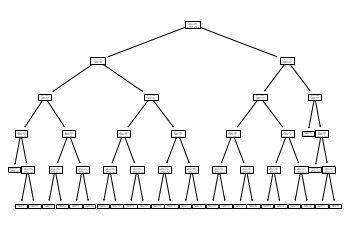

In [113]:
#plotting the tree
tree.plot_tree(model);

In [114]:
#predicting on test data
preds=model.predict(x_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0], dtype=int64)

In [115]:
pd.Series(preds).value_counts()

0    95
2    18
3     7
dtype: int64

In [116]:
#getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0,2,3
binned,,,
0,65,10,2
1,0,1,0
2,17,6,0
3,13,1,5


In [117]:
#accuracy
np.mean(preds==y_test)

0.6333333333333333